# Walmart Sales Forecasting
## 데이터셋 설명

```
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

- stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

- train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week
test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

- features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

- Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week

- For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
```

## 라이브러리 로드

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

## 데이터 로드

In [67]:
base_path = "../data/Minip4"

store = pd.read_csv(f'{base_path}/stores.csv') 
print(store.shape)
store.head(2)

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [68]:
feature = pd.read_csv(f'{base_path}/features.csv.zip') 
print(feature.shape)
feature.head(2)

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [69]:
train = pd.read_csv(f'{base_path}/train.csv.zip') 
print(train.shape)
train.head(2)

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [70]:
test = pd.read_csv(f'{base_path}/test.csv.zip') 
print(test.shape)
test.head(2)

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [71]:
submission = pd.read_csv(f'{base_path}/sampleSubmission.csv.zip') 
print(submission.shape)
submission.head(2)

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0


In [72]:
# merge to make train dataset
df_train = train.merge(store, how='left').merge(feature, how='left')
print(df_train.shape)
df_train.head(2)

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [73]:
# merge to make test dataset
df_test = test.merge(store, how='left').merge(feature, how='left')
print(df_test.shape)
df_test.head(2)

(115064, 15)


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Type(obeject)과 IsHoliday(bool)을 제외한 나머지 피처들은 모두 수치형 데이터이다.

In [75]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


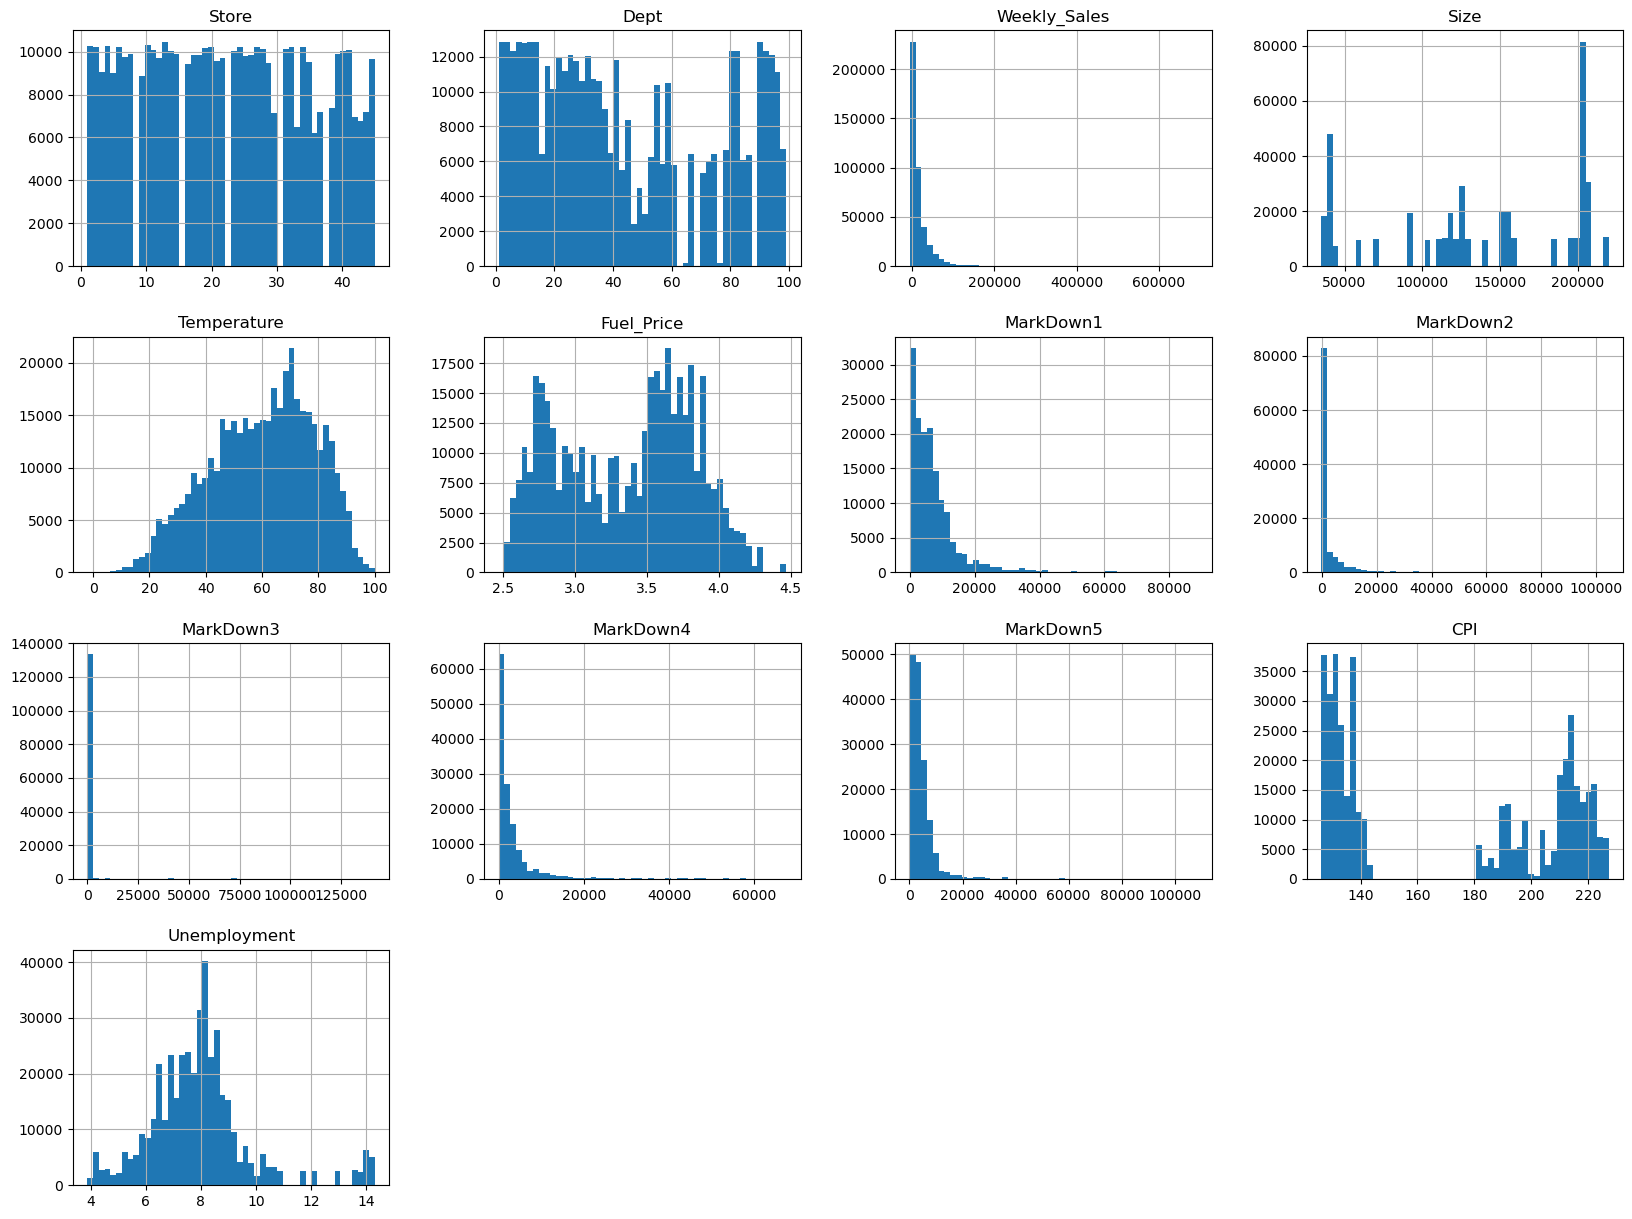

In [76]:
df_train.hist(bins=50, figsize=(20, 15));

In [77]:
# 결측치 확인
train_null = df_train.isnull().sum()
train_null

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

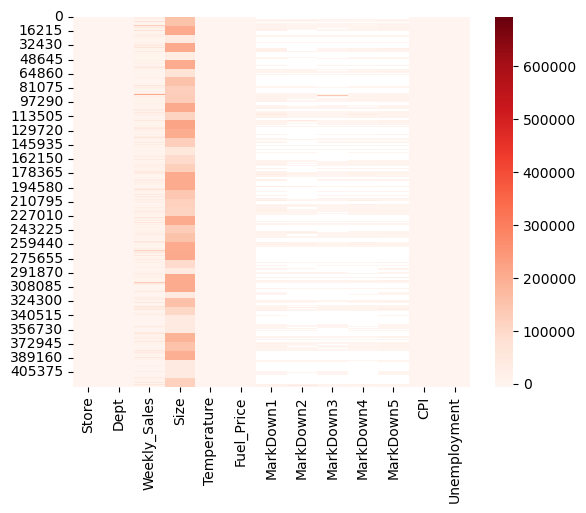

In [78]:
# 결측치 시각화
sns.heatmap(df_train.select_dtypes(include="number"), cmap="Reds");

```
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. 
데이터 설명에도 쓰여있듯이 프로모션과 연관된 Markdown1-5에 결측치가 많고 다른 피처들에는 결측치가 없다.
```

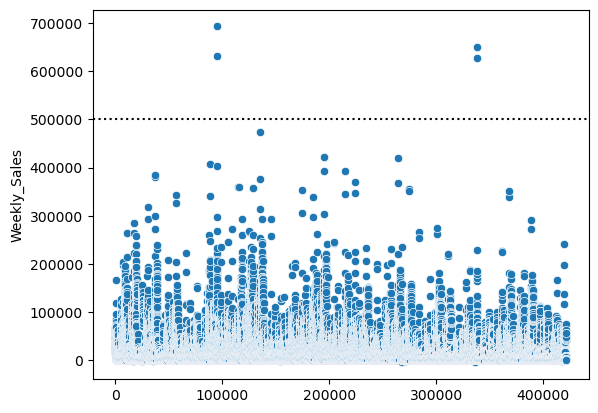

In [79]:
# 레이블값 이상치 확인 시각화
sns.scatterplot(data=df_train, x=train.index, y="Weekly_Sales");
plt.axhline(500000, c="k", ls=":");

In [80]:
# 500000을 기준으로 찾은 이상치 값
df_train.loc[df_train["Weekly_Sales"] > 500000, "Weekly_Sales"]

95373     693099.36
95425     630999.19
337961    627962.93
338013    649770.18
Name: Weekly_Sales, dtype: float64

## EDA

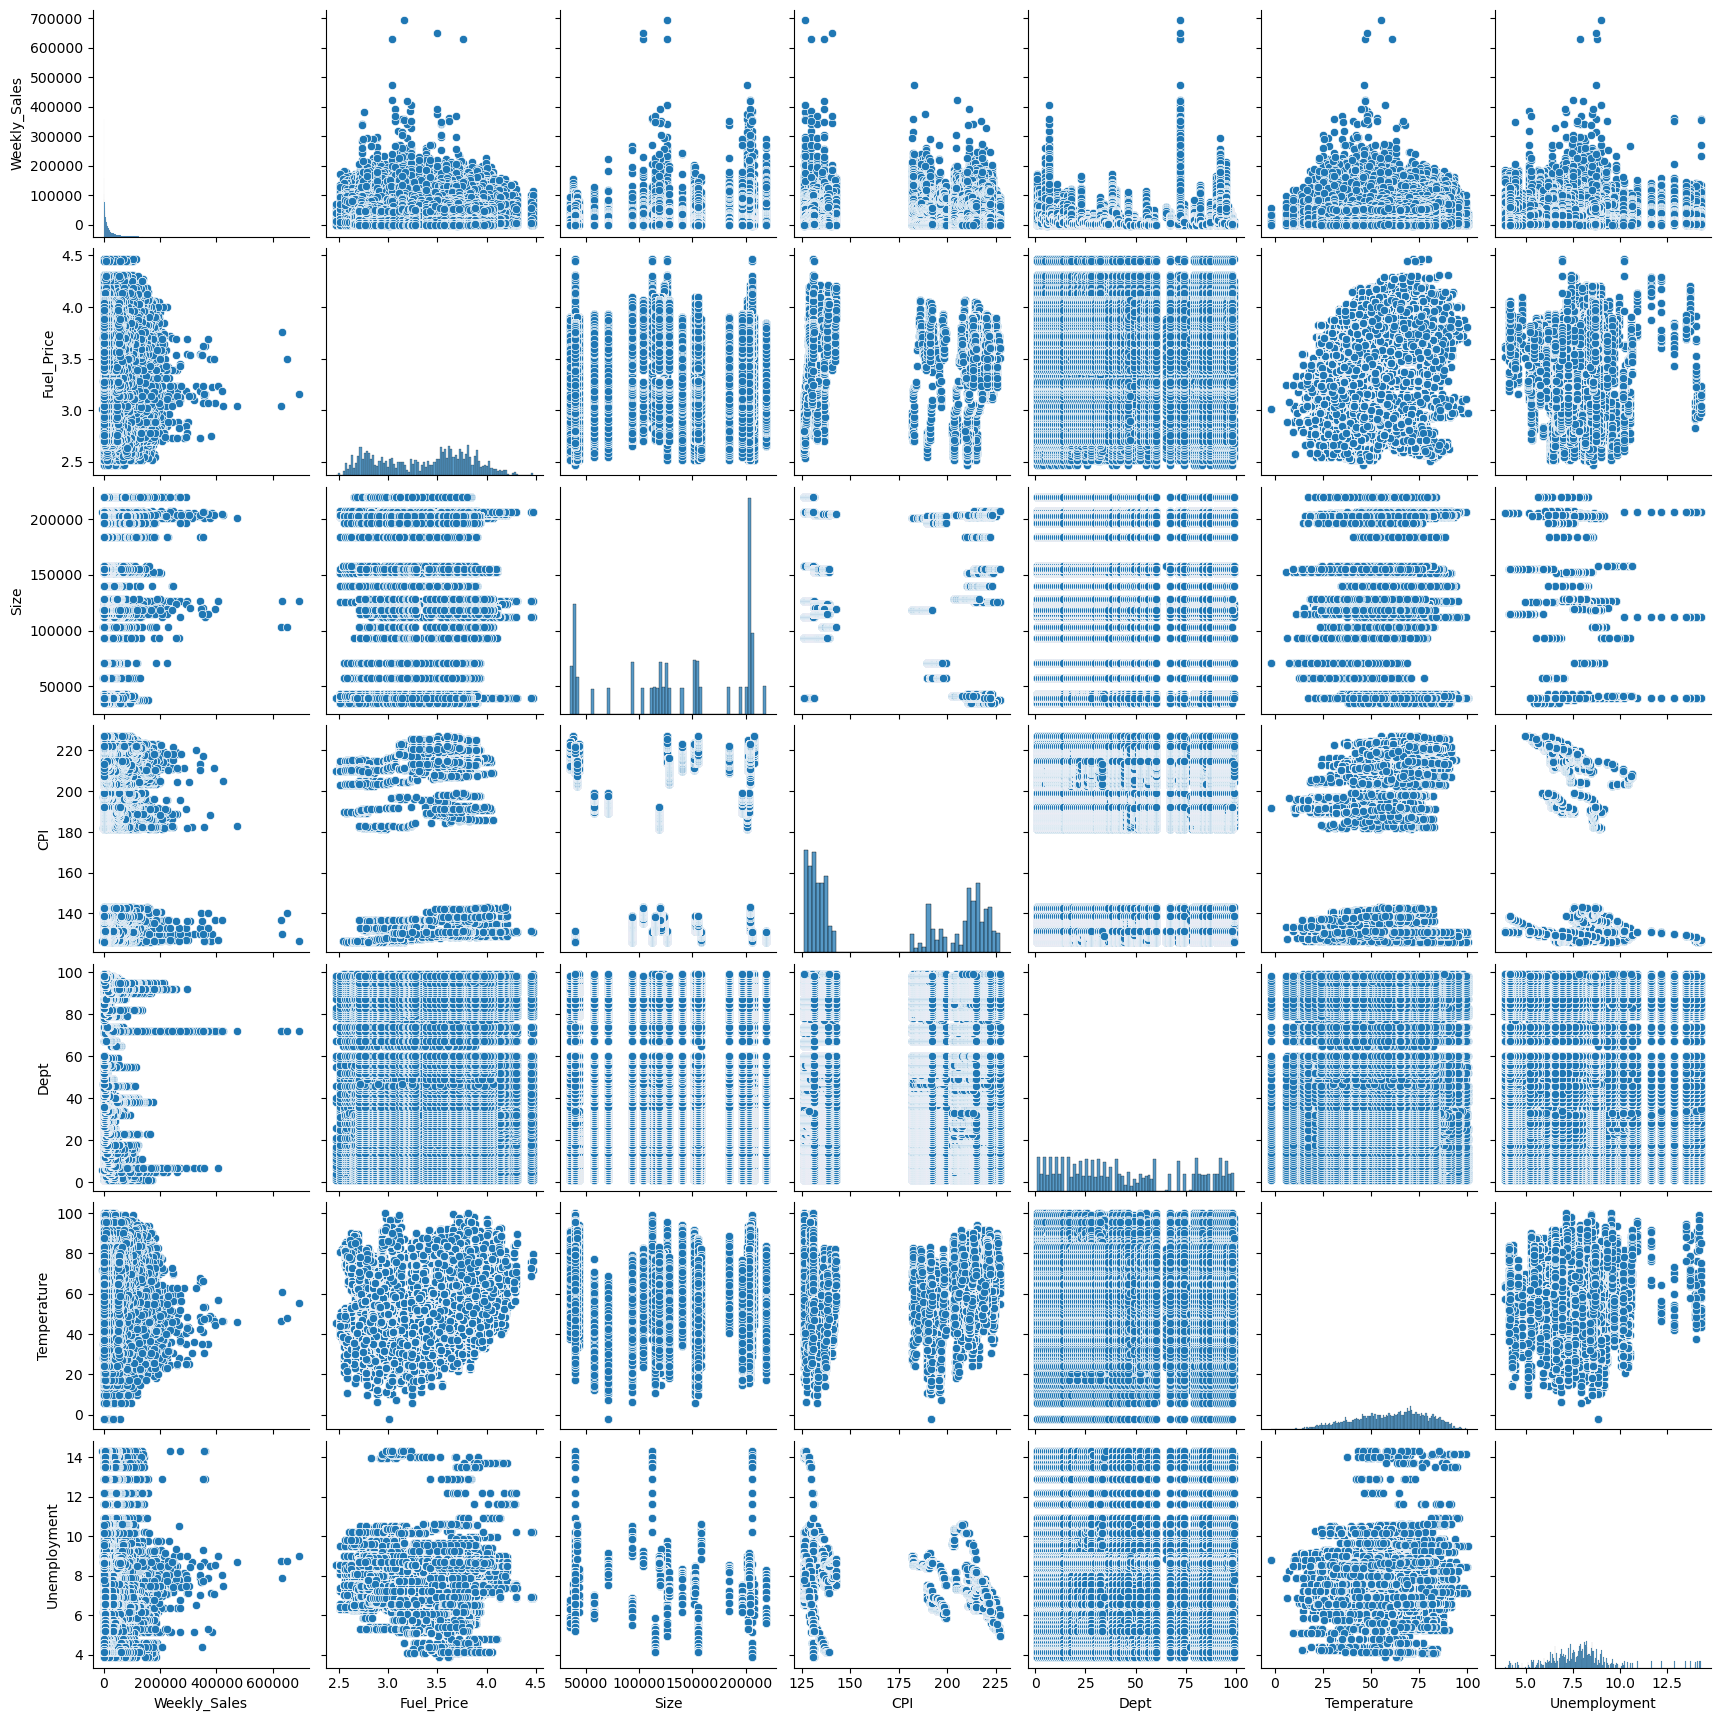

In [81]:
# Markdown 1-5를 제외한 나머지 피처 시각화
sns.pairplot(data=df_train, 
             vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment']);

In [82]:
# 날짜 타입별로 나눠주기
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Week'] = df.Date.dt.week
    df['Day'] = df.Date.dt.day
    
split_date(df_train) 
split_date(df_test)   

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_30248/869919322.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_30248/869919322.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [83]:
# 주 단위로 데이터 묶어주기
df_week = df_train.groupby('Week').sum()
print(df_week.shape)
df_week.head(2)

(52, 17)


,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
Week,,,,,,,,,,,,,,,,,
1,130899,260501,87731209.72,0,806775433,222343.25,18872.529,14993973.93,67007392.71,353486.72,3078155.61,15506769.87,1.008962e+06,46396.361,11873906,5903,38348
2,131036,260045,82696756.52,0,805424262,204005.74,19098.337,10198579.88,29235314.34,218513.27,1565390.83,11416226.10,1.007821e+06,46330.934,11855800,5894,79550


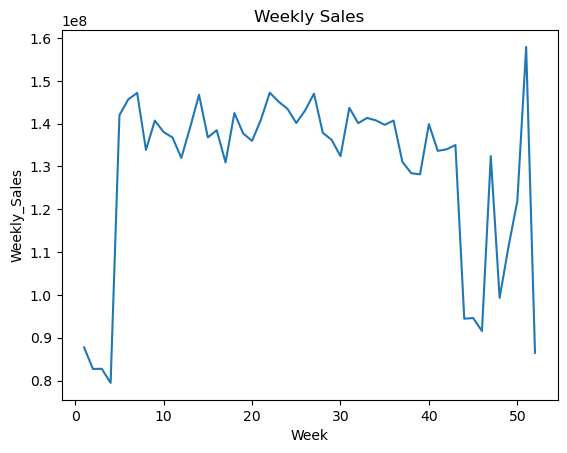

In [84]:
# 주간 매출액 시각화
sns.lineplot(data=df_week, x="Week", y="Weekly_Sales").set_title("Weekly Sales");

해당 데이터는 2010-02-05 부터 2012-11-01까지의 데이터이다. 주별 수익은 대체로 비슷한데 44주차부터 46주차에 많이 떨어지다 연말에 많이 오른 것을 확인 할 수 있다.

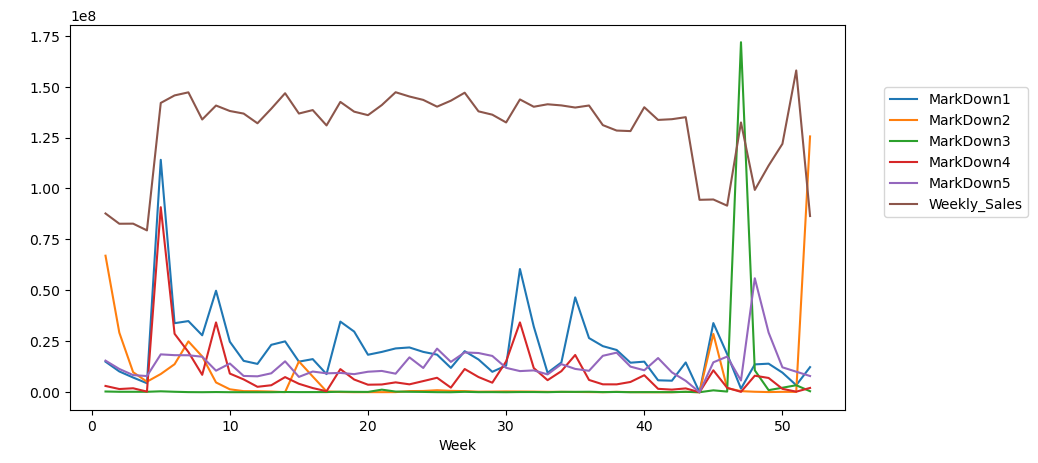

In [85]:
# 주별 매출액과 Markdown 1-5 시각화
plt.figure(figsize=(10,5));

sns.lineplot(data=df_week, x=df_week.index, y='MarkDown1');
sns.lineplot(data=df_week, x=df_week.index, y='MarkDown2');
sns.lineplot(data=df_week, x=df_week.index, y='MarkDown3');
sns.lineplot(data=df_week, x=df_week.index, y='MarkDown4');
sns.lineplot(data=df_week, x=df_week.index, y='MarkDown5');
sns.lineplot(data=df_week, x=df_week.index, y='Weekly_Sales');
plt.ylabel(' ')

plt.legend(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Weekly_Sales"],
          loc=(1.05, 0.5));

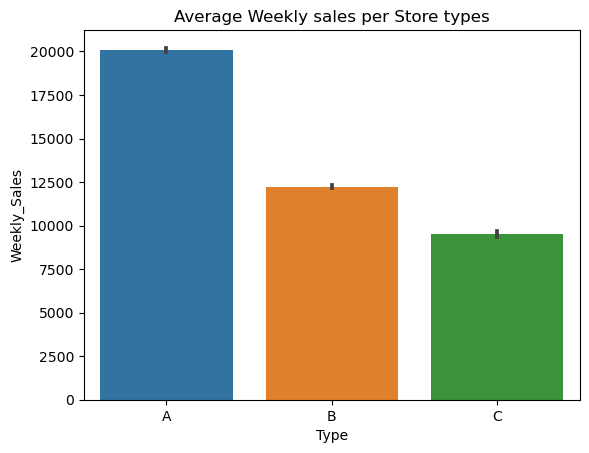

In [86]:
# 스토어 타입별 인기도 시각화
sns.barplot(data=df_train, x="Type", y="Weekly_Sales").set_title("Average Weekly sales per Store types");

A store의 주간 매출이 가장 높다.

In [87]:
# 스토어별로 매출액 평균으로 묶어주기
store_sales = df_train.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
store_sales.head()

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
Name: Weekly_Sales, dtype: float64

In [88]:
# 스토어별 평균 매출액 시각화
fig = px.bar(store_sales, x=store_sales.index, y=store_sales.values,  
       title="Average Sales per Store", labels={'x':'Stores', 'y':'Sales'})

fig.update_xaxes(tick0=1, dtick=1)

스토어별 매출액이 천차만별이다.

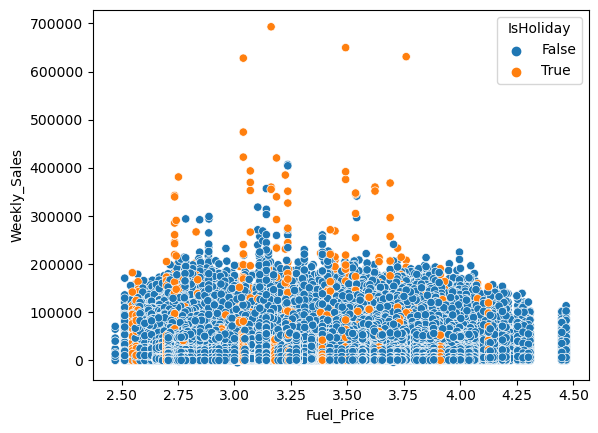

In [89]:
# 휴가별 기름 가격과 주간 매출액의 관계 시각화
sns.scatterplot(data=df_train, x="Fuel_Price", y="Weekly_Sales", hue="IsHoliday");

유의미한 관계는 보이지 않지만 기름 가격이 낮을 때 주간 매출액이 조금 더 높은 경향이 있다.

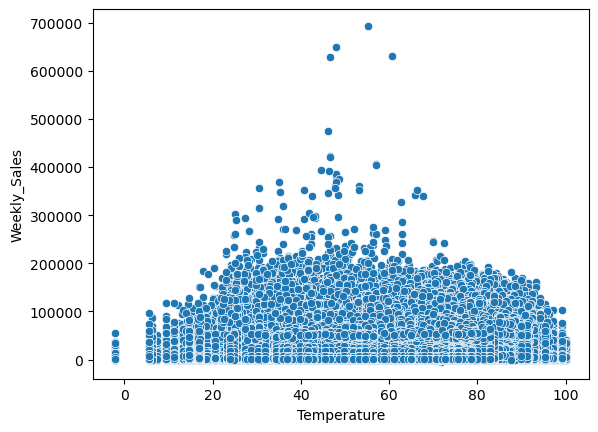

In [90]:
# 온도과 주간 매출액의 관계 시각화
sns.scatterplot(data=df_train, x="Temperature", y="Weekly_Sales");

해당 데이터셋에 기온은 화씨로 기록된 것으로 보이며, 기온이 너무 낮거나 너무 높을 때 보다 10℃ 전후일 때 주간 매출액이 높은 것으로 보인다.

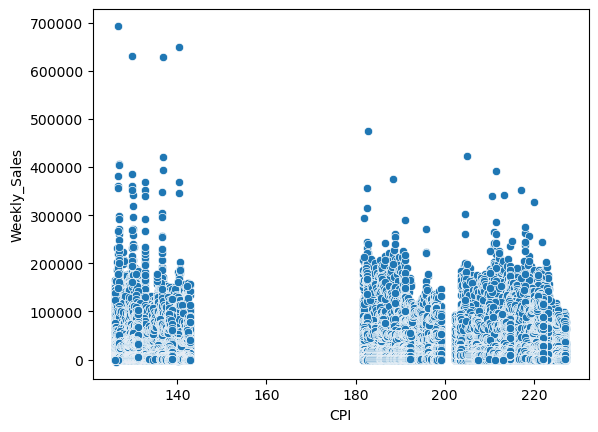

In [91]:
# 소비자물가지수와 주간 매출액의 관계 시각화
sns.scatterplot(data=df_train, x="CPI", y="Weekly_Sales");

유의미한 관계는 보이지 않지만, 소비자물가지수가 낮을 때 매출액이 높은 것을 확인 할 수 있다.

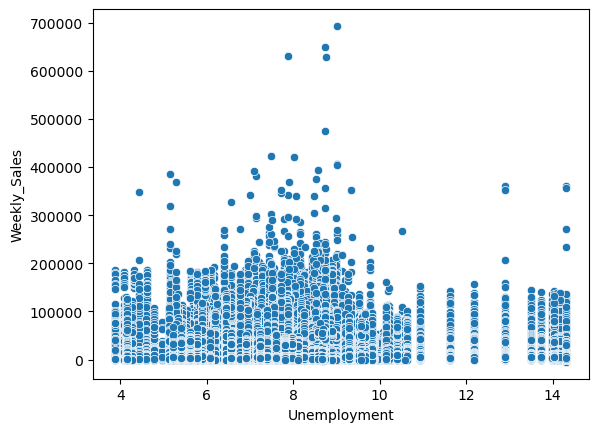

In [92]:
# 휴가별 실업률과 주간 매출액의 관계 시각화
sns.scatterplot(data=df_train, x="Unemployment", y="Weekly_Sales");

실업률이 낮을 때 주간 매출액이 상승하는 경향이 있다.

In [93]:
# 피처별 상관관계
corr = df_train.corr()

In [94]:
mask = np.triu(np.ones_like(corr))

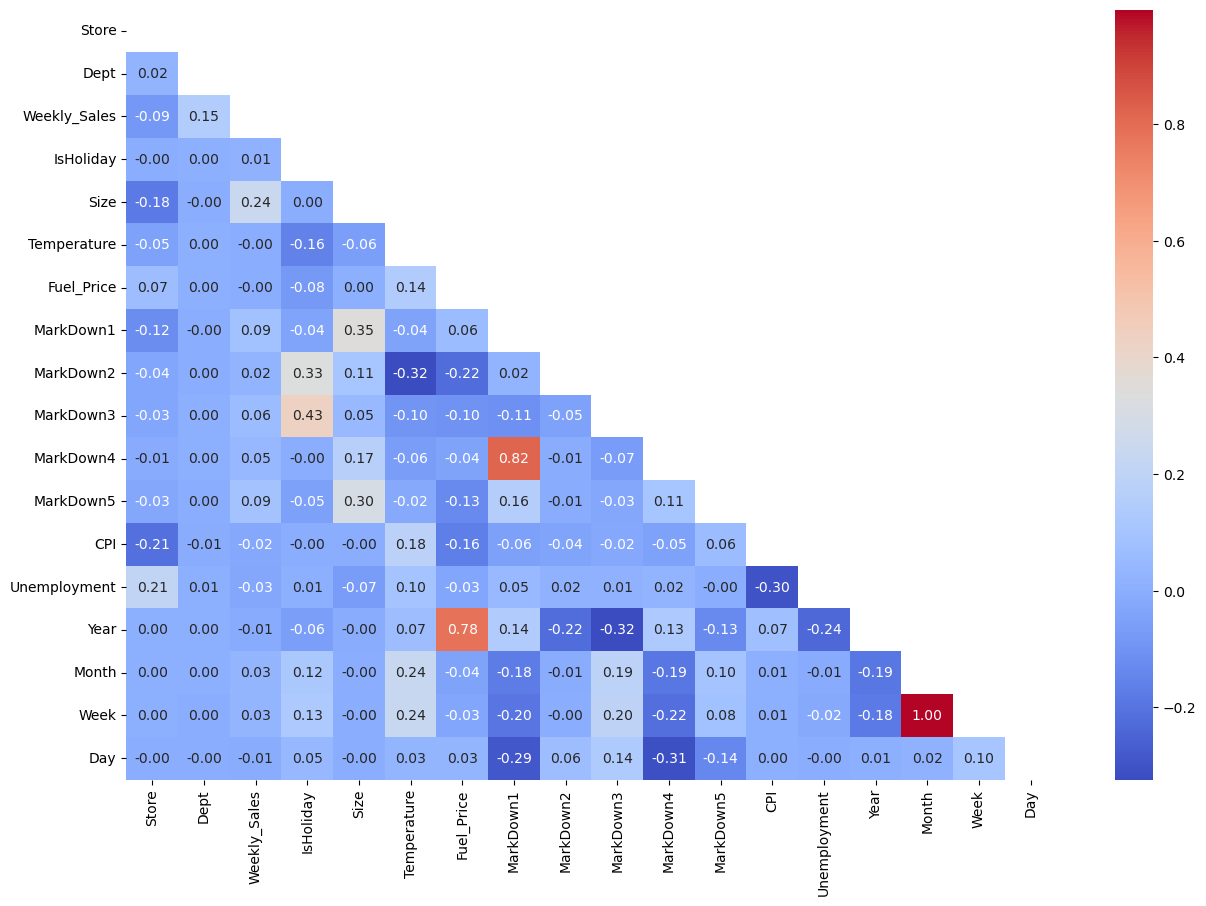

In [95]:
# 상관관계 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt='.2f');

```
Weekly_Sales와 유의미한 상관관계를 가진 피처는 Size를 제외하면 없다. 
Markdown1-5은 Weekly_Sales와 매우 약한 상관관계를 보인다. 
Temperature, Fuel price, CPI 와 Unemployment는 Weekly_Sales와 매우 약한 음의 상관관계를 보이기 때문에 분석에서 제외하겠다.
```

In [96]:
size= df_train.groupby('Size').mean()

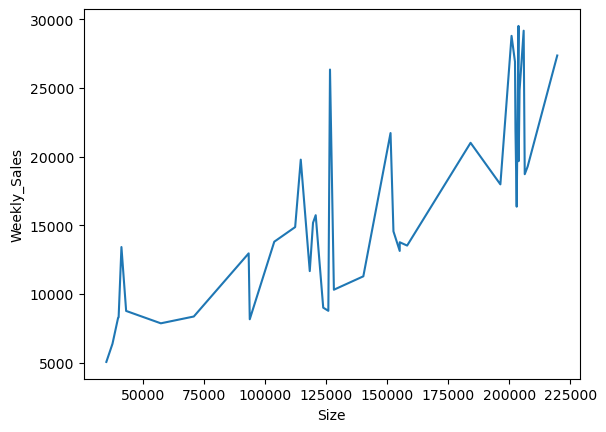

In [97]:
# 주간 매출액과 사이즈의 관계 시각화
sns.lineplot(data=size, x = size.index, y = size.Weekly_Sales);

heatmap에서도 확인했듯이 매장사이즈는 주간 매출액에 영향을 미친다.

## Feature Engineering

In [98]:
# 결측치 확인
df_train.isnull().sum()[df_train.isnull().sum() > 0]

MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64

In [99]:
# 결측치 확인
df_test.isnull().sum()[df_test.isnull().sum() > 0]

MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
CPI             38162
Unemployment    38162
dtype: int64

In [100]:
# 결측치 0으로 채우기
df_train.loc[df_train["MarkDown1"].isnull(), "MarkDown1"] = 0
df_train.loc[df_train["MarkDown2"].isnull(), "MarkDown2"] = 0
df_train.loc[df_train["MarkDown3"].isnull(), "MarkDown3"] = 0
df_train.loc[df_train["MarkDown4"].isnull(), "MarkDown4"] = 0
df_train.loc[df_train["MarkDown5"].isnull(), "MarkDown5"] = 0

In [102]:
# 결측치 0으로 채우기
df_test.loc[df_test["MarkDown1"].isnull(), "MarkDown1"] = 0
df_test.loc[df_test["MarkDown2"].isnull(), "MarkDown2"] = 0
df_test.loc[df_test["MarkDown3"].isnull(), "MarkDown3"] = 0
df_test.loc[df_test["MarkDown4"].isnull(), "MarkDown4"] = 0
df_test.loc[df_test["MarkDown5"].isnull(), "MarkDown5"] = 0

In [103]:
data_train = df_train.copy()
data_test = df_test.copy()

In [104]:
data_train["CPI_interpolate"] = data_train["CPI"].interpolate(method="linear", limit_direction="both")
data_train["Unemployment_interpolate"] = data_train["Unemployment"].interpolate(method="linear", limit_direction="both")

In [105]:
data_test["CPI_interpolate"] = data_test["CPI"].interpolate(method="linear", limit_direction="both")
data_test["Unemployment_interpolate"] = data_test["Unemployment"].interpolate(method="linear", limit_direction="both")

In [106]:
data_train = data_train.drop(columns=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Date', 'Day', 'IsHoliday'])

In [107]:
print(data_train.shape)
data_train.head(2)

(421570, 15)


,Store,Dept,Weekly_Sales,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,CPI_interpolate,Unemployment_interpolate
0,1,1,24924.50,A,151315,0.0,0.0,0.0,0.0,0.0,2010,2,5,211.096358,8.106
1,1,1,46039.49,A,151315,0.0,0.0,0.0,0.0,0.0,2010,2,6,211.242170,8.106


In [108]:
data_test = data_test.drop(columns=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Date', 'Day', 'IsHoliday'])

In [109]:
print(data_test.shape)
data_test.head(2)

(115064, 14)


,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,CPI_interpolate,Unemployment_interpolate
0,1,1,A,151315,6766.44,5147.70,50.82,3639.90,2737.42,2012,11,44,223.462779,6.573
1,1,1,A,151315,11421.32,3370.89,40.28,4646.79,6154.16,2012,11,45,223.481307,6.573


In [110]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
data_train_ohe = ohe.fit_transform(data_train.select_dtypes(exclude="number"))
data_test_ohe = ohe.transform(data_test.select_dtypes(exclude="number"))

print(data_train_ohe.shape, data_test_ohe.shape)

(421570, 3) (115064, 3)


In [111]:
data_train_ohe = pd.DataFrame(data_train_ohe.toarray(), columns=ohe.get_feature_names_out())
data_train_ohe.index = data_train.index
data_train_ohe

,Type_A,Type_B,Type_C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
421565,0.0,1.0,0.0
421566,0.0,1.0,0.0
421567,0.0,1.0,0.0
421568,0.0,1.0,0.0


In [112]:
data_test_ohe = pd.DataFrame(data_test_ohe.toarray(), columns=ohe.get_feature_names_out())
data_test_ohe.index = data_test.index
data_test_ohe

,Type_A,Type_B,Type_C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
115059,0.0,1.0,0.0
115060,0.0,1.0,0.0
115061,0.0,1.0,0.0
115062,0.0,1.0,0.0


In [113]:
data_train_num = data_train.select_dtypes(include="number")
df_train = pd.concat([data_train_num, data_train_ohe], axis=1)

data_train_num.shape, data_train_ohe.shape, df_train.shape

((421570, 14), (421570, 3), (421570, 17))

In [114]:
data_test_num = data_test.select_dtypes(include="number")
df_test = pd.concat([data_test_num, data_test_ohe], axis=1)

data_test_num.shape, data_test_ohe.shape, df_test.shape

((115064, 13), (115064, 3), (115064, 16))

## 학습, 검증 세트 나누기

In [115]:
X = df_train.drop(columns="Weekly_Sales")
y = df_train["Weekly_Sales"]
print(X.shape, y.shape)
display(X.head())
display(y.head())

(421570, 16) (421570,)


,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,CPI_interpolate,Unemployment_interpolate,Type_A,Type_B,Type_C
0,1,1,151315,0.0,0.0,0.0,0.0,0.0,2010,2,5,211.096358,8.106,1.0,0.0,0.0
1,1,1,151315,0.0,0.0,0.0,0.0,0.0,2010,2,6,211.242170,8.106,1.0,0.0,0.0
2,1,1,151315,0.0,0.0,0.0,0.0,0.0,2010,2,7,211.289143,8.106,1.0,0.0,0.0
3,1,1,151315,0.0,0.0,0.0,0.0,0.0,2010,2,8,211.319643,8.106,1.0,0.0,0.0
4,1,1,151315,0.0,0.0,0.0,0.0,0.0,2010,3,9,211.350143,8.106,1.0,0.0,0.0


0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [116]:
df_train

,Store,Dept,Weekly_Sales,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,CPI_interpolate,Unemployment_interpolate,Type_A,Type_B,Type_C
0,1,1,24924.50,151315,0.00,0.00,0.00,0.00,0.00,2010,2,5,211.096358,8.106,1.0,0.0,0.0
1,1,1,46039.49,151315,0.00,0.00,0.00,0.00,0.00,2010,2,6,211.242170,8.106,1.0,0.0,0.0
2,1,1,41595.55,151315,0.00,0.00,0.00,0.00,0.00,2010,2,7,211.289143,8.106,1.0,0.0,0.0
3,1,1,19403.54,151315,0.00,0.00,0.00,0.00,0.00,2010,2,8,211.319643,8.106,1.0,0.0,0.0
4,1,1,21827.90,151315,0.00,0.00,0.00,0.00,0.00,2010,3,9,211.350143,8.106,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,118221,4556.61,20.64,1.50,1601.01,3288.25,2012,9,39,192.013558,8.684,0.0,1.0,0.0
421566,45,98,628.10,118221,5046.74,0.00,18.82,2253.43,2340.01,2012,10,40,192.170412,8.667,0.0,1.0,0.0
421567,45,98,1061.02,118221,1956.28,0.00,7.89,599.32,3990.54,2012,10,41,192.327265,8.667,0.0,1.0,0.0
421568,45,98,760.01,118221,2004.02,0.00,3.18,437.73,1537.49,2012,10,42,192.330854,8.667,0.0,1.0,0.0


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)

X_test = df_test

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((337256, 16), (84314, 16), (337256,), (84314,), (115064, 16))

## 머신러닝 모델

In [118]:
def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

In [119]:
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
          '    LGBM': lgb.LGBMRegressor(random_state=42),
          ' XGBoost': xgb.XGBRegressor(random_state=42),
          'Catboost': cb.CatBoostRegressor(random_state=42),          
          ' ExtraTr': ExtraTreesRegressor(random_state=42),
          ' RandomF': RandomForestRegressor(random_state=42),
          'Gradient' : GradientBoostingRegressor(random_state=42)
         }

In [120]:
def model_evaluation(name, model, models, X_train, y_train, X_valid, y_valid):
   
    rmses = []
    
    for i in range(len(models)):
    
        # Model 학습
        model.fit(X_train, y_train)
        
        # Model 예측
        y_pred = model.predict(X_valid)

        # RMSE
        rmse = np.sqrt(np.mean((y_valid - y_pred)**2))
        rmses.append(rmse)
        
    return np.mean(rmses)

In [121]:
for name, model in models.items():
    print(name + ' Valid RMSE {:.4f}'.format(model_evaluation(name, model, models, 
                                                              X_train, y_train, X_valid, y_valid)))

    LGBM Valid RMSE 6829.9281
 XGBoost Valid RMSE 5386.9941
Learning rate set to 0.102706
0:	learn: 21777.8695671	total: 73.5ms	remaining: 1m 13s
1:	learn: 21025.7145067	total: 86.8ms	remaining: 43.3s
2:	learn: 20363.5778449	total: 99.5ms	remaining: 33.1s
3:	learn: 19798.7558427	total: 111ms	remaining: 27.7s
4:	learn: 19262.4916797	total: 123ms	remaining: 24.4s
5:	learn: 18858.9779675	total: 142ms	remaining: 23.5s
6:	learn: 18513.1848541	total: 153ms	remaining: 21.8s
7:	learn: 18152.0442750	total: 166ms	remaining: 20.6s
8:	learn: 17894.0250856	total: 178ms	remaining: 19.6s
9:	learn: 17629.7706874	total: 191ms	remaining: 18.9s
10:	learn: 17057.9508936	total: 205ms	remaining: 18.5s
11:	learn: 16810.8195860	total: 217ms	remaining: 17.9s
12:	learn: 16623.1106985	total: 228ms	remaining: 17.3s
13:	learn: 16435.6194860	total: 239ms	remaining: 16.8s
14:	learn: 15954.8416225	total: 252ms	remaining: 16.5s
15:	learn: 15809.8109004	total: 262ms	remaining: 16.1s
16:	learn: 15652.2953385	total: 274m

160:	learn: 8886.9919455	total: 2.13s	remaining: 11.1s
161:	learn: 8875.7195204	total: 2.14s	remaining: 11.1s
162:	learn: 8858.7221604	total: 2.16s	remaining: 11.1s
163:	learn: 8847.3315601	total: 2.17s	remaining: 11.1s
164:	learn: 8837.9630266	total: 2.18s	remaining: 11s
165:	learn: 8827.8772953	total: 2.2s	remaining: 11s
166:	learn: 8814.7361760	total: 2.21s	remaining: 11.1s
167:	learn: 8796.9394119	total: 2.24s	remaining: 11.1s
168:	learn: 8780.4558751	total: 2.25s	remaining: 11.1s
169:	learn: 8766.6524856	total: 2.26s	remaining: 11.1s
170:	learn: 8729.0178944	total: 2.28s	remaining: 11s
171:	learn: 8709.2299672	total: 2.29s	remaining: 11s
172:	learn: 8697.6629078	total: 2.3s	remaining: 11s
173:	learn: 8687.7069367	total: 2.32s	remaining: 11s
174:	learn: 8673.8519898	total: 2.33s	remaining: 11s
175:	learn: 8657.7371587	total: 2.34s	remaining: 11s
176:	learn: 8648.3734466	total: 2.36s	remaining: 11s
177:	learn: 8635.8152403	total: 2.37s	remaining: 10.9s
178:	learn: 8629.6391584	total

319:	learn: 7401.9306394	total: 4.21s	remaining: 8.95s
320:	learn: 7391.4176356	total: 4.23s	remaining: 8.94s
321:	learn: 7381.5833179	total: 4.24s	remaining: 8.93s
322:	learn: 7377.5085555	total: 4.25s	remaining: 8.91s
323:	learn: 7371.9250797	total: 4.26s	remaining: 8.9s
324:	learn: 7366.8851867	total: 4.28s	remaining: 8.88s
325:	learn: 7362.4373117	total: 4.29s	remaining: 8.87s
326:	learn: 7358.4657127	total: 4.3s	remaining: 8.85s
327:	learn: 7354.5162331	total: 4.31s	remaining: 8.83s
328:	learn: 7339.3131636	total: 4.32s	remaining: 8.82s
329:	learn: 7334.4993580	total: 4.33s	remaining: 8.8s
330:	learn: 7324.2214965	total: 4.35s	remaining: 8.79s
331:	learn: 7317.8704468	total: 4.36s	remaining: 8.77s
332:	learn: 7311.9312273	total: 4.37s	remaining: 8.76s
333:	learn: 7305.9604506	total: 4.39s	remaining: 8.75s
334:	learn: 7298.8833290	total: 4.4s	remaining: 8.73s
335:	learn: 7290.0455947	total: 4.41s	remaining: 8.71s
336:	learn: 7281.7789747	total: 4.42s	remaining: 8.71s
337:	learn: 72

483:	learn: 6624.6929270	total: 6.27s	remaining: 6.69s
484:	learn: 6620.8515949	total: 6.29s	remaining: 6.67s
485:	learn: 6617.2326951	total: 6.3s	remaining: 6.66s
486:	learn: 6613.7371384	total: 6.31s	remaining: 6.65s
487:	learn: 6610.5549899	total: 6.32s	remaining: 6.63s
488:	learn: 6608.0278551	total: 6.34s	remaining: 6.62s
489:	learn: 6604.9201167	total: 6.35s	remaining: 6.61s
490:	learn: 6600.8774767	total: 6.37s	remaining: 6.6s
491:	learn: 6597.6001731	total: 6.38s	remaining: 6.58s
492:	learn: 6594.3440097	total: 6.39s	remaining: 6.57s
493:	learn: 6590.0251444	total: 6.4s	remaining: 6.56s
494:	learn: 6585.8441269	total: 6.41s	remaining: 6.54s
495:	learn: 6582.5498328	total: 6.42s	remaining: 6.53s
496:	learn: 6579.6638104	total: 6.43s	remaining: 6.51s
497:	learn: 6578.4613733	total: 6.45s	remaining: 6.5s
498:	learn: 6573.9203643	total: 6.46s	remaining: 6.48s
499:	learn: 6570.2086181	total: 6.47s	remaining: 6.47s
500:	learn: 6566.8989306	total: 6.48s	remaining: 6.46s
501:	learn: 65

633:	learn: 6154.7504271	total: 8.14s	remaining: 4.7s
634:	learn: 6153.0022012	total: 8.15s	remaining: 4.68s
635:	learn: 6150.6919418	total: 8.16s	remaining: 4.67s
636:	learn: 6148.6274995	total: 8.17s	remaining: 4.66s
637:	learn: 6147.1301804	total: 8.18s	remaining: 4.64s
638:	learn: 6144.8779978	total: 8.19s	remaining: 4.63s
639:	learn: 6140.4591047	total: 8.2s	remaining: 4.61s
640:	learn: 6138.6470030	total: 8.22s	remaining: 4.6s
641:	learn: 6137.0856757	total: 8.23s	remaining: 4.59s
642:	learn: 6134.5683924	total: 8.24s	remaining: 4.58s
643:	learn: 6131.6070225	total: 8.25s	remaining: 4.56s
644:	learn: 6129.7774648	total: 8.27s	remaining: 4.55s
645:	learn: 6128.0462502	total: 8.28s	remaining: 4.54s
646:	learn: 6125.6040141	total: 8.29s	remaining: 4.52s
647:	learn: 6118.8954367	total: 8.3s	remaining: 4.51s
648:	learn: 6116.9304152	total: 8.31s	remaining: 4.5s
649:	learn: 6115.5447914	total: 8.33s	remaining: 4.48s
650:	learn: 6113.7697149	total: 8.35s	remaining: 4.47s
651:	learn: 611

796:	learn: 5768.0264785	total: 10.2s	remaining: 2.6s
797:	learn: 5766.3389262	total: 10.2s	remaining: 2.58s
798:	learn: 5764.6002703	total: 10.2s	remaining: 2.57s
799:	learn: 5763.3978206	total: 10.2s	remaining: 2.56s
800:	learn: 5762.1281226	total: 10.2s	remaining: 2.54s
801:	learn: 5760.2768646	total: 10.3s	remaining: 2.53s
802:	learn: 5759.0608048	total: 10.3s	remaining: 2.52s
803:	learn: 5758.3941384	total: 10.3s	remaining: 2.51s
804:	learn: 5756.0399297	total: 10.3s	remaining: 2.49s
805:	learn: 5752.9520268	total: 10.3s	remaining: 2.48s
806:	learn: 5751.6854263	total: 10.3s	remaining: 2.47s
807:	learn: 5749.1358511	total: 10.3s	remaining: 2.45s
808:	learn: 5747.7153390	total: 10.3s	remaining: 2.44s
809:	learn: 5746.4672505	total: 10.4s	remaining: 2.43s
810:	learn: 5743.6630682	total: 10.4s	remaining: 2.42s
811:	learn: 5742.6196919	total: 10.4s	remaining: 2.4s
812:	learn: 5741.3235407	total: 10.4s	remaining: 2.39s
813:	learn: 5740.1539835	total: 10.4s	remaining: 2.38s
814:	learn: 

959:	learn: 5494.2558200	total: 12.3s	remaining: 511ms
960:	learn: 5493.2952374	total: 12.3s	remaining: 498ms
961:	learn: 5492.1594346	total: 12.3s	remaining: 485ms
962:	learn: 5490.0767175	total: 12.3s	remaining: 472ms
963:	learn: 5488.5716257	total: 12.3s	remaining: 460ms
964:	learn: 5487.8852682	total: 12.3s	remaining: 447ms
965:	learn: 5487.0383029	total: 12.3s	remaining: 434ms
966:	learn: 5486.2650189	total: 12.3s	remaining: 421ms
967:	learn: 5485.8437502	total: 12.4s	remaining: 408ms
968:	learn: 5484.6573297	total: 12.4s	remaining: 396ms
969:	learn: 5480.4045603	total: 12.4s	remaining: 383ms
970:	learn: 5479.7710309	total: 12.4s	remaining: 370ms
971:	learn: 5479.1386200	total: 12.4s	remaining: 357ms
972:	learn: 5477.1297306	total: 12.4s	remaining: 344ms
973:	learn: 5476.2014162	total: 12.4s	remaining: 332ms
974:	learn: 5472.3753774	total: 12.4s	remaining: 319ms
975:	learn: 5471.4723599	total: 12.4s	remaining: 306ms
976:	learn: 5470.6448029	total: 12.5s	remaining: 293ms
977:	learn

114:	learn: 9681.8647594	total: 1.45s	remaining: 11.1s
115:	learn: 9658.9322130	total: 1.46s	remaining: 11.1s
116:	learn: 9642.8986985	total: 1.47s	remaining: 11.1s
117:	learn: 9628.1531029	total: 1.48s	remaining: 11.1s
118:	learn: 9589.8100458	total: 1.49s	remaining: 11.1s
119:	learn: 9565.2339584	total: 1.51s	remaining: 11s
120:	learn: 9550.9300263	total: 1.52s	remaining: 11s
121:	learn: 9529.6043165	total: 1.53s	remaining: 11s
122:	learn: 9498.3451038	total: 1.54s	remaining: 11s
123:	learn: 9478.9214736	total: 1.55s	remaining: 11s
124:	learn: 9449.6861578	total: 1.56s	remaining: 10.9s
125:	learn: 9435.3324900	total: 1.58s	remaining: 10.9s
126:	learn: 9415.4213266	total: 1.59s	remaining: 10.9s
127:	learn: 9400.2700727	total: 1.6s	remaining: 10.9s
128:	learn: 9386.9721244	total: 1.61s	remaining: 10.9s
129:	learn: 9368.4107614	total: 1.62s	remaining: 10.9s
130:	learn: 9357.7552443	total: 1.63s	remaining: 10.8s
131:	learn: 9339.9254763	total: 1.65s	remaining: 10.9s
132:	learn: 9324.5402

264:	learn: 7750.2226808	total: 3.29s	remaining: 9.13s
265:	learn: 7745.5198399	total: 3.31s	remaining: 9.12s
266:	learn: 7740.4729542	total: 3.32s	remaining: 9.11s
267:	learn: 7726.6265011	total: 3.33s	remaining: 9.1s
268:	learn: 7720.1011833	total: 3.35s	remaining: 9.09s
269:	learn: 7714.5321019	total: 3.36s	remaining: 9.08s
270:	learn: 7710.1207735	total: 3.37s	remaining: 9.07s
271:	learn: 7704.1963125	total: 3.38s	remaining: 9.06s
272:	learn: 7698.4380343	total: 3.4s	remaining: 9.04s
273:	learn: 7693.2589625	total: 3.41s	remaining: 9.03s
274:	learn: 7685.7456955	total: 3.42s	remaining: 9.02s
275:	learn: 7673.9882889	total: 3.43s	remaining: 9s
276:	learn: 7668.6421551	total: 3.45s	remaining: 9s
277:	learn: 7664.4251348	total: 3.46s	remaining: 8.99s
278:	learn: 7659.9216399	total: 3.47s	remaining: 8.97s
279:	learn: 7653.6253496	total: 3.49s	remaining: 8.96s
280:	learn: 7648.9378206	total: 3.5s	remaining: 8.96s
281:	learn: 7641.4702186	total: 3.52s	remaining: 8.96s
282:	learn: 7637.08

416:	learn: 6870.2276439	total: 5.62s	remaining: 7.86s
417:	learn: 6864.4232216	total: 5.63s	remaining: 7.85s
418:	learn: 6857.1222988	total: 5.65s	remaining: 7.84s
419:	learn: 6852.8800913	total: 5.67s	remaining: 7.83s
420:	learn: 6848.5959175	total: 5.68s	remaining: 7.82s
421:	learn: 6843.5586569	total: 5.7s	remaining: 7.8s
422:	learn: 6840.8943272	total: 5.72s	remaining: 7.8s
423:	learn: 6837.3199340	total: 5.73s	remaining: 7.78s
424:	learn: 6831.4109209	total: 5.74s	remaining: 7.77s
425:	learn: 6828.5864479	total: 5.75s	remaining: 7.75s
426:	learn: 6824.4103131	total: 5.77s	remaining: 7.75s
427:	learn: 6823.1773330	total: 5.79s	remaining: 7.73s
428:	learn: 6819.3484109	total: 5.81s	remaining: 7.73s
429:	learn: 6816.3287266	total: 5.83s	remaining: 7.73s
430:	learn: 6812.9957810	total: 5.85s	remaining: 7.73s
431:	learn: 6809.7873807	total: 5.87s	remaining: 7.72s
432:	learn: 6807.7001523	total: 5.89s	remaining: 7.72s
433:	learn: 6803.7884087	total: 5.9s	remaining: 7.7s
434:	learn: 680

572:	learn: 6309.2111933	total: 7.91s	remaining: 5.9s
573:	learn: 6308.1702976	total: 7.93s	remaining: 5.88s
574:	learn: 6306.3968301	total: 7.94s	remaining: 5.87s
575:	learn: 6304.8062568	total: 7.96s	remaining: 5.86s
576:	learn: 6303.4071500	total: 7.98s	remaining: 5.85s
577:	learn: 6301.7152295	total: 8s	remaining: 5.84s
578:	learn: 6299.5304285	total: 8.01s	remaining: 5.83s
579:	learn: 6297.8689470	total: 8.03s	remaining: 5.81s
580:	learn: 6294.7576769	total: 8.05s	remaining: 5.8s
581:	learn: 6290.3605057	total: 8.08s	remaining: 5.8s
582:	learn: 6288.4149694	total: 8.11s	remaining: 5.8s
583:	learn: 6286.2350692	total: 8.13s	remaining: 5.79s
584:	learn: 6284.4757947	total: 8.16s	remaining: 5.79s
585:	learn: 6282.1883254	total: 8.18s	remaining: 5.78s
586:	learn: 6280.6161919	total: 8.22s	remaining: 5.78s
587:	learn: 6278.9796812	total: 8.24s	remaining: 5.77s
588:	learn: 6276.3005194	total: 8.26s	remaining: 5.76s
589:	learn: 6272.8807830	total: 8.28s	remaining: 5.76s
590:	learn: 6269.

725:	learn: 5914.7901586	total: 10.7s	remaining: 4.05s
726:	learn: 5913.2373480	total: 10.8s	remaining: 4.04s
727:	learn: 5912.2656302	total: 10.8s	remaining: 4.02s
728:	learn: 5911.2195323	total: 10.8s	remaining: 4.01s
729:	learn: 5910.0056667	total: 10.8s	remaining: 4s
730:	learn: 5908.0223047	total: 10.8s	remaining: 3.98s
731:	learn: 5907.0629720	total: 10.8s	remaining: 3.97s
732:	learn: 5905.6878778	total: 10.8s	remaining: 3.95s
733:	learn: 5904.7451507	total: 10.9s	remaining: 3.94s
734:	learn: 5902.6022649	total: 10.9s	remaining: 3.92s
735:	learn: 5899.6853734	total: 10.9s	remaining: 3.9s
736:	learn: 5897.9101428	total: 10.9s	remaining: 3.89s
737:	learn: 5896.7473769	total: 10.9s	remaining: 3.88s
738:	learn: 5895.8025322	total: 10.9s	remaining: 3.87s
739:	learn: 5894.3180718	total: 11s	remaining: 3.85s
740:	learn: 5892.3266538	total: 11s	remaining: 3.84s
741:	learn: 5888.8413928	total: 11s	remaining: 3.82s
742:	learn: 5885.3223830	total: 11s	remaining: 3.81s
743:	learn: 5884.65573

882:	learn: 5604.6132982	total: 13.5s	remaining: 1.79s
883:	learn: 5601.9094107	total: 13.5s	remaining: 1.77s
884:	learn: 5601.3564252	total: 13.5s	remaining: 1.76s
885:	learn: 5599.3312642	total: 13.6s	remaining: 1.74s
886:	learn: 5597.8663647	total: 13.6s	remaining: 1.73s
887:	learn: 5597.0966346	total: 13.6s	remaining: 1.72s
888:	learn: 5595.8492407	total: 13.6s	remaining: 1.7s
889:	learn: 5595.1888243	total: 13.6s	remaining: 1.69s
890:	learn: 5591.4915651	total: 13.7s	remaining: 1.67s
891:	learn: 5590.5574636	total: 13.7s	remaining: 1.66s
892:	learn: 5589.5073733	total: 13.7s	remaining: 1.64s
893:	learn: 5588.4815253	total: 13.7s	remaining: 1.63s
894:	learn: 5587.4557424	total: 13.7s	remaining: 1.61s
895:	learn: 5585.8478220	total: 13.7s	remaining: 1.59s
896:	learn: 5584.2366167	total: 13.8s	remaining: 1.58s
897:	learn: 5583.1099957	total: 13.8s	remaining: 1.56s
898:	learn: 5581.4159817	total: 13.8s	remaining: 1.55s
899:	learn: 5579.6028250	total: 13.8s	remaining: 1.53s
900:	learn:

46:	learn: 12094.8335067	total: 648ms	remaining: 13.1s
47:	learn: 12048.7746971	total: 660ms	remaining: 13.1s
48:	learn: 11996.6763546	total: 671ms	remaining: 13s
49:	learn: 11972.9539043	total: 681ms	remaining: 12.9s
50:	learn: 11878.1914032	total: 694ms	remaining: 12.9s
51:	learn: 11809.3594812	total: 705ms	remaining: 12.9s
52:	learn: 11764.2660649	total: 717ms	remaining: 12.8s
53:	learn: 11726.5437664	total: 730ms	remaining: 12.8s
54:	learn: 11693.7404474	total: 741ms	remaining: 12.7s
55:	learn: 11656.9027144	total: 754ms	remaining: 12.7s
56:	learn: 11627.0442208	total: 764ms	remaining: 12.6s
57:	learn: 11588.3855289	total: 776ms	remaining: 12.6s
58:	learn: 11540.4734418	total: 793ms	remaining: 12.6s
59:	learn: 11447.5301043	total: 806ms	remaining: 12.6s
60:	learn: 11411.5525550	total: 817ms	remaining: 12.6s
61:	learn: 11378.4556640	total: 829ms	remaining: 12.5s
62:	learn: 11339.9845000	total: 840ms	remaining: 12.5s
63:	learn: 11288.9896909	total: 856ms	remaining: 12.5s
64:	learn: 1

205:	learn: 8278.0101897	total: 2.94s	remaining: 11.3s
206:	learn: 8268.0904756	total: 2.95s	remaining: 11.3s
207:	learn: 8252.8151341	total: 2.97s	remaining: 11.3s
208:	learn: 8243.7390732	total: 2.98s	remaining: 11.3s
209:	learn: 8233.9611392	total: 2.99s	remaining: 11.3s
210:	learn: 8226.7763815	total: 3.01s	remaining: 11.3s
211:	learn: 8220.5962571	total: 3.02s	remaining: 11.2s
212:	learn: 8216.8664865	total: 3.04s	remaining: 11.2s
213:	learn: 8209.7788860	total: 3.05s	remaining: 11.2s
214:	learn: 8201.8653279	total: 3.06s	remaining: 11.2s
215:	learn: 8191.8104415	total: 3.08s	remaining: 11.2s
216:	learn: 8183.7783784	total: 3.09s	remaining: 11.2s
217:	learn: 8175.3663899	total: 3.1s	remaining: 11.1s
218:	learn: 8168.3647511	total: 3.11s	remaining: 11.1s
219:	learn: 8159.3705552	total: 3.15s	remaining: 11.2s
220:	learn: 8149.6390189	total: 3.19s	remaining: 11.2s
221:	learn: 8138.5753982	total: 3.22s	remaining: 11.3s
222:	learn: 8133.2869547	total: 3.24s	remaining: 11.3s
223:	learn:

356:	learn: 7170.5090891	total: 5.24s	remaining: 9.44s
357:	learn: 7165.4489347	total: 5.25s	remaining: 9.42s
358:	learn: 7161.5043347	total: 5.26s	remaining: 9.4s
359:	learn: 7156.8983560	total: 5.28s	remaining: 9.38s
360:	learn: 7154.6126963	total: 5.29s	remaining: 9.36s
361:	learn: 7149.6140873	total: 5.3s	remaining: 9.34s
362:	learn: 7146.9038957	total: 5.31s	remaining: 9.32s
363:	learn: 7135.7987784	total: 5.32s	remaining: 9.3s
364:	learn: 7132.1592049	total: 5.34s	remaining: 9.29s
365:	learn: 7129.8588733	total: 5.35s	remaining: 9.27s
366:	learn: 7126.8629175	total: 5.36s	remaining: 9.25s
367:	learn: 7123.4135988	total: 5.38s	remaining: 9.25s
368:	learn: 7118.1745612	total: 5.4s	remaining: 9.23s
369:	learn: 7112.8153428	total: 5.41s	remaining: 9.22s
370:	learn: 7110.3113355	total: 5.42s	remaining: 9.19s
371:	learn: 7105.1820733	total: 5.43s	remaining: 9.17s
372:	learn: 7100.4020433	total: 5.45s	remaining: 9.16s
373:	learn: 7091.5986166	total: 5.47s	remaining: 9.15s
374:	learn: 70

508:	learn: 6537.1683336	total: 7.11s	remaining: 6.85s
509:	learn: 6526.4737657	total: 7.12s	remaining: 6.84s
510:	learn: 6522.1173623	total: 7.13s	remaining: 6.82s
511:	learn: 6519.3529778	total: 7.14s	remaining: 6.81s
512:	learn: 6514.1767135	total: 7.15s	remaining: 6.79s
513:	learn: 6508.7047431	total: 7.16s	remaining: 6.77s
514:	learn: 6503.8309458	total: 7.18s	remaining: 6.76s
515:	learn: 6500.3684002	total: 7.19s	remaining: 6.74s
516:	learn: 6498.8417090	total: 7.2s	remaining: 6.73s
517:	learn: 6496.0483012	total: 7.21s	remaining: 6.71s
518:	learn: 6492.1917879	total: 7.22s	remaining: 6.69s
519:	learn: 6488.7040005	total: 7.24s	remaining: 6.68s
520:	learn: 6486.3316240	total: 7.25s	remaining: 6.66s
521:	learn: 6483.8461754	total: 7.26s	remaining: 6.64s
522:	learn: 6480.2217854	total: 7.27s	remaining: 6.63s
523:	learn: 6478.5312766	total: 7.28s	remaining: 6.61s
524:	learn: 6460.7567453	total: 7.29s	remaining: 6.6s
525:	learn: 6458.3214104	total: 7.31s	remaining: 6.58s
526:	learn: 

673:	learn: 6051.4243244	total: 9.15s	remaining: 4.42s
674:	learn: 6049.6775514	total: 9.16s	remaining: 4.41s
675:	learn: 6047.0192102	total: 9.17s	remaining: 4.4s
676:	learn: 6043.2839578	total: 9.18s	remaining: 4.38s
677:	learn: 6041.0817482	total: 9.2s	remaining: 4.37s
678:	learn: 6039.6728967	total: 9.21s	remaining: 4.35s
679:	learn: 6037.5274418	total: 9.22s	remaining: 4.34s
680:	learn: 6035.7928421	total: 9.24s	remaining: 4.33s
681:	learn: 6034.5409763	total: 9.25s	remaining: 4.31s
682:	learn: 6033.3063677	total: 9.26s	remaining: 4.3s
683:	learn: 6030.5283862	total: 9.28s	remaining: 4.28s
684:	learn: 6028.0331584	total: 9.29s	remaining: 4.27s
685:	learn: 6027.0376663	total: 9.3s	remaining: 4.26s
686:	learn: 6025.5278556	total: 9.31s	remaining: 4.24s
687:	learn: 6023.5360639	total: 9.32s	remaining: 4.23s
688:	learn: 6018.5837797	total: 9.33s	remaining: 4.21s
689:	learn: 6016.8622884	total: 9.35s	remaining: 4.2s
690:	learn: 6009.1726168	total: 9.36s	remaining: 4.18s
691:	learn: 600

839:	learn: 5693.6631564	total: 11.5s	remaining: 2.19s
840:	learn: 5692.5777121	total: 11.5s	remaining: 2.18s
841:	learn: 5691.4455237	total: 11.5s	remaining: 2.16s
842:	learn: 5690.3810044	total: 11.5s	remaining: 2.15s
843:	learn: 5688.3626239	total: 11.5s	remaining: 2.13s
844:	learn: 5686.4439021	total: 11.6s	remaining: 2.12s
845:	learn: 5684.8446503	total: 11.6s	remaining: 2.11s
846:	learn: 5669.8016933	total: 11.6s	remaining: 2.09s
847:	learn: 5667.3462952	total: 11.6s	remaining: 2.08s
848:	learn: 5666.0206669	total: 11.6s	remaining: 2.06s
849:	learn: 5664.6505214	total: 11.6s	remaining: 2.05s
850:	learn: 5663.9122723	total: 11.6s	remaining: 2.04s
851:	learn: 5661.5239576	total: 11.6s	remaining: 2.02s
852:	learn: 5659.2592710	total: 11.7s	remaining: 2.01s
853:	learn: 5657.1692593	total: 11.7s	remaining: 1.99s
854:	learn: 5650.3078631	total: 11.7s	remaining: 1.98s
855:	learn: 5649.5932009	total: 11.7s	remaining: 1.97s
856:	learn: 5647.6917603	total: 11.7s	remaining: 1.95s
857:	learn

990:	learn: 5448.0669923	total: 13.4s	remaining: 121ms
991:	learn: 5445.7442081	total: 13.4s	remaining: 108ms
992:	learn: 5444.3433525	total: 13.4s	remaining: 94.4ms
993:	learn: 5443.8666963	total: 13.4s	remaining: 80.9ms
994:	learn: 5442.6046064	total: 13.4s	remaining: 67.4ms
995:	learn: 5440.7896507	total: 13.4s	remaining: 53.9ms
996:	learn: 5440.2356193	total: 13.4s	remaining: 40.4ms
997:	learn: 5439.7149370	total: 13.4s	remaining: 26.9ms
998:	learn: 5438.6388982	total: 13.5s	remaining: 13.5ms
999:	learn: 5437.4207322	total: 13.5s	remaining: 0us
Learning rate set to 0.102706
0:	learn: 21777.8695671	total: 17ms	remaining: 17s
1:	learn: 21025.7145067	total: 30ms	remaining: 15s
2:	learn: 20363.5778449	total: 47.7ms	remaining: 15.9s
3:	learn: 19798.7558427	total: 59.2ms	remaining: 14.7s
4:	learn: 19262.4916797	total: 69.6ms	remaining: 13.9s
5:	learn: 18858.9779675	total: 81.7ms	remaining: 13.5s
6:	learn: 18513.1848541	total: 93.7ms	remaining: 13.3s
7:	learn: 18152.0442750	total: 105ms	r

148:	learn: 9070.9788583	total: 1.86s	remaining: 10.7s
149:	learn: 9055.6671892	total: 1.88s	remaining: 10.7s
150:	learn: 9028.1432379	total: 1.9s	remaining: 10.7s
151:	learn: 9008.5929466	total: 1.91s	remaining: 10.6s
152:	learn: 8992.8123750	total: 1.92s	remaining: 10.6s
153:	learn: 8980.0234639	total: 1.93s	remaining: 10.6s
154:	learn: 8956.2000491	total: 1.94s	remaining: 10.6s
155:	learn: 8938.9413828	total: 1.96s	remaining: 10.6s
156:	learn: 8927.5309020	total: 1.97s	remaining: 10.6s
157:	learn: 8917.3875528	total: 1.98s	remaining: 10.6s
158:	learn: 8907.0866153	total: 1.99s	remaining: 10.5s
159:	learn: 8895.8670418	total: 2s	remaining: 10.5s
160:	learn: 8886.9919455	total: 2.01s	remaining: 10.5s
161:	learn: 8875.7195204	total: 2.03s	remaining: 10.5s
162:	learn: 8858.7221604	total: 2.04s	remaining: 10.5s
163:	learn: 8847.3315601	total: 2.05s	remaining: 10.4s
164:	learn: 8837.9630266	total: 2.06s	remaining: 10.4s
165:	learn: 8827.8772953	total: 2.08s	remaining: 10.4s
166:	learn: 88

313:	learn: 7435.0288049	total: 3.93s	remaining: 8.59s
314:	learn: 7425.4723604	total: 3.94s	remaining: 8.57s
315:	learn: 7419.8698927	total: 3.95s	remaining: 8.56s
316:	learn: 7415.9848892	total: 3.96s	remaining: 8.54s
317:	learn: 7410.2969168	total: 3.98s	remaining: 8.53s
318:	learn: 7406.7417848	total: 3.99s	remaining: 8.52s
319:	learn: 7401.9306394	total: 4s	remaining: 8.51s
320:	learn: 7391.4176356	total: 4.02s	remaining: 8.5s
321:	learn: 7381.5833179	total: 4.03s	remaining: 8.48s
322:	learn: 7377.5085555	total: 4.04s	remaining: 8.47s
323:	learn: 7371.9250797	total: 4.05s	remaining: 8.46s
324:	learn: 7366.8851867	total: 4.06s	remaining: 8.44s
325:	learn: 7362.4373117	total: 4.08s	remaining: 8.43s
326:	learn: 7358.4657127	total: 4.09s	remaining: 8.42s
327:	learn: 7354.5162331	total: 4.1s	remaining: 8.41s
328:	learn: 7339.3131636	total: 4.11s	remaining: 8.39s
329:	learn: 7334.4993580	total: 4.13s	remaining: 8.38s
330:	learn: 7324.2214965	total: 4.15s	remaining: 8.38s
331:	learn: 731

479:	learn: 6641.2714592	total: 6.05s	remaining: 6.56s
480:	learn: 6636.5950248	total: 6.07s	remaining: 6.54s
481:	learn: 6631.9447808	total: 6.08s	remaining: 6.53s
482:	learn: 6628.8658892	total: 6.09s	remaining: 6.51s
483:	learn: 6624.6929270	total: 6.1s	remaining: 6.5s
484:	learn: 6620.8515949	total: 6.11s	remaining: 6.49s
485:	learn: 6617.2326951	total: 6.13s	remaining: 6.48s
486:	learn: 6613.7371384	total: 6.14s	remaining: 6.46s
487:	learn: 6610.5549899	total: 6.15s	remaining: 6.45s
488:	learn: 6608.0278551	total: 6.17s	remaining: 6.45s
489:	learn: 6604.9201167	total: 6.18s	remaining: 6.43s
490:	learn: 6600.8774767	total: 6.19s	remaining: 6.42s
491:	learn: 6597.6001731	total: 6.21s	remaining: 6.41s
492:	learn: 6594.3440097	total: 6.22s	remaining: 6.39s
493:	learn: 6590.0251444	total: 6.23s	remaining: 6.38s
494:	learn: 6585.8441269	total: 6.24s	remaining: 6.37s
495:	learn: 6582.5498328	total: 6.26s	remaining: 6.36s
496:	learn: 6579.6638104	total: 6.28s	remaining: 6.35s
497:	learn: 

640:	learn: 6138.6470030	total: 8.11s	remaining: 4.54s
641:	learn: 6137.0856757	total: 8.12s	remaining: 4.53s
642:	learn: 6134.5683924	total: 8.13s	remaining: 4.51s
643:	learn: 6131.6070225	total: 8.14s	remaining: 4.5s
644:	learn: 6129.7774648	total: 8.16s	remaining: 4.49s
645:	learn: 6128.0462502	total: 8.17s	remaining: 4.47s
646:	learn: 6125.6040141	total: 8.18s	remaining: 4.46s
647:	learn: 6118.8954367	total: 8.19s	remaining: 4.45s
648:	learn: 6116.9304152	total: 8.2s	remaining: 4.44s
649:	learn: 6115.5447914	total: 8.22s	remaining: 4.42s
650:	learn: 6113.7697149	total: 8.23s	remaining: 4.41s
651:	learn: 6112.1741636	total: 8.24s	remaining: 4.4s
652:	learn: 6110.7720315	total: 8.26s	remaining: 4.39s
653:	learn: 6108.7973277	total: 8.27s	remaining: 4.37s
654:	learn: 6107.5964404	total: 8.28s	remaining: 4.36s
655:	learn: 6104.3341182	total: 8.29s	remaining: 4.35s
656:	learn: 6102.3780779	total: 8.3s	remaining: 4.33s
657:	learn: 6099.2155849	total: 8.31s	remaining: 4.32s
658:	learn: 60

790:	learn: 5791.5101577	total: 9.97s	remaining: 2.63s
791:	learn: 5789.1697623	total: 9.98s	remaining: 2.62s
792:	learn: 5783.5574826	total: 10s	remaining: 2.61s
793:	learn: 5780.2440267	total: 10s	remaining: 2.6s
794:	learn: 5778.1984669	total: 10s	remaining: 2.58s
795:	learn: 5771.5223141	total: 10s	remaining: 2.57s
796:	learn: 5768.0264785	total: 10s	remaining: 2.56s
797:	learn: 5766.3389262	total: 10.1s	remaining: 2.55s
798:	learn: 5764.6002703	total: 10.1s	remaining: 2.53s
799:	learn: 5763.3978206	total: 10.1s	remaining: 2.52s
800:	learn: 5762.1281226	total: 10.1s	remaining: 2.51s
801:	learn: 5760.2768646	total: 10.1s	remaining: 2.5s
802:	learn: 5759.0608048	total: 10.1s	remaining: 2.48s
803:	learn: 5758.3941384	total: 10.1s	remaining: 2.47s
804:	learn: 5756.0399297	total: 10.1s	remaining: 2.46s
805:	learn: 5752.9520268	total: 10.1s	remaining: 2.44s
806:	learn: 5751.6854263	total: 10.2s	remaining: 2.43s
807:	learn: 5749.1358511	total: 10.2s	remaining: 2.42s
808:	learn: 5747.71533

951:	learn: 5510.4080030	total: 12s	remaining: 606ms
952:	learn: 5507.3710289	total: 12s	remaining: 594ms
953:	learn: 5506.3245497	total: 12s	remaining: 581ms
954:	learn: 5502.2133817	total: 12.1s	remaining: 568ms
955:	learn: 5500.9192489	total: 12.1s	remaining: 556ms
956:	learn: 5499.5700353	total: 12.1s	remaining: 543ms
957:	learn: 5497.6564150	total: 12.1s	remaining: 531ms
958:	learn: 5495.1762079	total: 12.1s	remaining: 518ms
959:	learn: 5494.2558200	total: 12.1s	remaining: 505ms
960:	learn: 5493.2952374	total: 12.1s	remaining: 493ms
961:	learn: 5492.1594346	total: 12.2s	remaining: 480ms
962:	learn: 5490.0767175	total: 12.2s	remaining: 467ms
963:	learn: 5488.5716257	total: 12.2s	remaining: 455ms
964:	learn: 5487.8852682	total: 12.2s	remaining: 442ms
965:	learn: 5487.0383029	total: 12.2s	remaining: 430ms
966:	learn: 5486.2650189	total: 12.2s	remaining: 417ms
967:	learn: 5485.8437502	total: 12.2s	remaining: 404ms
968:	learn: 5484.6573297	total: 12.2s	remaining: 392ms
969:	learn: 5480

102:	learn: 9967.3405369	total: 1.29s	remaining: 11.2s
103:	learn: 9941.9614052	total: 1.3s	remaining: 11.2s
104:	learn: 9922.8722431	total: 1.31s	remaining: 11.2s
105:	learn: 9898.2487350	total: 1.32s	remaining: 11.2s
106:	learn: 9885.7143373	total: 1.33s	remaining: 11.1s
107:	learn: 9850.0917347	total: 1.35s	remaining: 11.2s
108:	learn: 9823.6844916	total: 1.36s	remaining: 11.1s
109:	learn: 9803.9976049	total: 1.37s	remaining: 11.1s
110:	learn: 9789.8783988	total: 1.38s	remaining: 11.1s
111:	learn: 9751.7011236	total: 1.4s	remaining: 11.1s
112:	learn: 9733.0905027	total: 1.41s	remaining: 11.1s
113:	learn: 9698.2605255	total: 1.43s	remaining: 11.1s
114:	learn: 9681.8647594	total: 1.44s	remaining: 11.1s
115:	learn: 9658.9322130	total: 1.45s	remaining: 11s
116:	learn: 9642.8986985	total: 1.46s	remaining: 11.1s
117:	learn: 9628.1531029	total: 1.47s	remaining: 11s
118:	learn: 9589.8100458	total: 1.49s	remaining: 11s
119:	learn: 9565.2339584	total: 1.5s	remaining: 11s
120:	learn: 9550.9300

263:	learn: 7754.7316130	total: 3.34s	remaining: 9.32s
264:	learn: 7750.2226808	total: 3.35s	remaining: 9.31s
265:	learn: 7745.5198399	total: 3.37s	remaining: 9.3s
266:	learn: 7740.4729542	total: 3.38s	remaining: 9.29s
267:	learn: 7726.6265011	total: 3.4s	remaining: 9.28s
268:	learn: 7720.1011833	total: 3.41s	remaining: 9.28s
269:	learn: 7714.5321019	total: 3.43s	remaining: 9.26s
270:	learn: 7710.1207735	total: 3.44s	remaining: 9.25s
271:	learn: 7704.1963125	total: 3.45s	remaining: 9.23s
272:	learn: 7698.4380343	total: 3.46s	remaining: 9.22s
273:	learn: 7693.2589625	total: 3.47s	remaining: 9.2s
274:	learn: 7685.7456955	total: 3.49s	remaining: 9.2s
275:	learn: 7673.9882889	total: 3.5s	remaining: 9.19s
276:	learn: 7668.6421551	total: 3.52s	remaining: 9.18s
277:	learn: 7664.4251348	total: 3.53s	remaining: 9.17s
278:	learn: 7659.9216399	total: 3.54s	remaining: 9.16s
279:	learn: 7653.6253496	total: 3.56s	remaining: 9.15s
280:	learn: 7648.9378206	total: 3.57s	remaining: 9.14s
281:	learn: 764

423:	learn: 6837.3199340	total: 5.39s	remaining: 7.32s
424:	learn: 6831.4109209	total: 5.4s	remaining: 7.3s
425:	learn: 6828.5864479	total: 5.41s	remaining: 7.29s
426:	learn: 6824.4103131	total: 5.42s	remaining: 7.27s
427:	learn: 6823.1773330	total: 5.43s	remaining: 7.26s
428:	learn: 6819.3484109	total: 5.44s	remaining: 7.25s
429:	learn: 6816.3287266	total: 5.46s	remaining: 7.23s
430:	learn: 6812.9957810	total: 5.47s	remaining: 7.22s
431:	learn: 6809.7873807	total: 5.48s	remaining: 7.21s
432:	learn: 6807.7001523	total: 5.49s	remaining: 7.19s
433:	learn: 6803.7884087	total: 5.5s	remaining: 7.18s
434:	learn: 6800.3354403	total: 5.52s	remaining: 7.17s
435:	learn: 6798.1223086	total: 5.53s	remaining: 7.15s
436:	learn: 6794.2816314	total: 5.54s	remaining: 7.14s
437:	learn: 6790.6731243	total: 5.55s	remaining: 7.12s
438:	learn: 6788.4091438	total: 5.56s	remaining: 7.11s
439:	learn: 6783.0766789	total: 5.57s	remaining: 7.09s
440:	learn: 6780.1120532	total: 5.58s	remaining: 7.08s
441:	learn: 6

585:	learn: 6282.1883254	total: 7.43s	remaining: 5.25s
586:	learn: 6280.6161919	total: 7.45s	remaining: 5.24s
587:	learn: 6278.9796812	total: 7.46s	remaining: 5.23s
588:	learn: 6276.3005194	total: 7.47s	remaining: 5.21s
589:	learn: 6272.8807830	total: 7.48s	remaining: 5.2s
590:	learn: 6269.9419285	total: 7.5s	remaining: 5.19s
591:	learn: 6267.3676323	total: 7.51s	remaining: 5.17s
592:	learn: 6265.3383208	total: 7.52s	remaining: 5.16s
593:	learn: 6262.2600771	total: 7.53s	remaining: 5.15s
594:	learn: 6259.3069776	total: 7.54s	remaining: 5.13s
595:	learn: 6257.7648611	total: 7.55s	remaining: 5.12s
596:	learn: 6254.1970750	total: 7.57s	remaining: 5.11s
597:	learn: 6252.5227413	total: 7.58s	remaining: 5.1s
598:	learn: 6250.5417554	total: 7.59s	remaining: 5.08s
599:	learn: 6246.1257294	total: 7.6s	remaining: 5.07s
600:	learn: 6244.8090304	total: 7.61s	remaining: 5.05s
601:	learn: 6243.0847525	total: 7.62s	remaining: 5.04s
602:	learn: 6241.7001920	total: 7.63s	remaining: 5.03s
603:	learn: 62

746:	learn: 5878.6300985	total: 9.5s	remaining: 3.22s
747:	learn: 5876.8936034	total: 9.51s	remaining: 3.2s
748:	learn: 5874.5899041	total: 9.53s	remaining: 3.19s
749:	learn: 5873.5622707	total: 9.54s	remaining: 3.18s
750:	learn: 5871.0830490	total: 9.56s	remaining: 3.17s
751:	learn: 5869.9187052	total: 9.57s	remaining: 3.16s
752:	learn: 5866.9331314	total: 9.59s	remaining: 3.14s
753:	learn: 5865.6373446	total: 9.6s	remaining: 3.13s
754:	learn: 5863.7250697	total: 9.61s	remaining: 3.12s
755:	learn: 5860.5378579	total: 9.63s	remaining: 3.11s
756:	learn: 5859.8107211	total: 9.64s	remaining: 3.1s
757:	learn: 5857.6715489	total: 9.65s	remaining: 3.08s
758:	learn: 5856.7373131	total: 9.67s	remaining: 3.07s
759:	learn: 5855.5678571	total: 9.68s	remaining: 3.06s
760:	learn: 5852.6177487	total: 9.69s	remaining: 3.04s
761:	learn: 5850.9222103	total: 9.7s	remaining: 3.03s
762:	learn: 5849.9665565	total: 9.71s	remaining: 3.02s
763:	learn: 5847.5781267	total: 9.73s	remaining: 3s
764:	learn: 5845.7

907:	learn: 5571.0760540	total: 11.5s	remaining: 1.17s
908:	learn: 5569.9986192	total: 11.6s	remaining: 1.16s
909:	learn: 5569.1455244	total: 11.6s	remaining: 1.14s
910:	learn: 5568.2850573	total: 11.6s	remaining: 1.13s
911:	learn: 5567.4505127	total: 11.6s	remaining: 1.12s
912:	learn: 5566.8450877	total: 11.6s	remaining: 1.1s
913:	learn: 5565.7721651	total: 11.6s	remaining: 1.09s
914:	learn: 5565.0941892	total: 11.6s	remaining: 1.08s
915:	learn: 5563.5202713	total: 11.6s	remaining: 1.07s
916:	learn: 5562.6720563	total: 11.7s	remaining: 1.05s
917:	learn: 5561.6789362	total: 11.7s	remaining: 1.04s
918:	learn: 5560.4657112	total: 11.7s	remaining: 1.03s
919:	learn: 5558.2526397	total: 11.7s	remaining: 1.02s
920:	learn: 5557.5833009	total: 11.7s	remaining: 1s
921:	learn: 5556.6559158	total: 11.7s	remaining: 991ms
922:	learn: 5555.6199821	total: 11.7s	remaining: 978ms
923:	learn: 5554.6004540	total: 11.7s	remaining: 966ms
924:	learn: 5553.8679280	total: 11.8s	remaining: 953ms
925:	learn: 55

66:	learn: 11123.9999526	total: 830ms	remaining: 11.6s
67:	learn: 11091.7273490	total: 855ms	remaining: 11.7s
68:	learn: 11052.1393207	total: 869ms	remaining: 11.7s
69:	learn: 11030.9719205	total: 883ms	remaining: 11.7s
70:	learn: 11000.8371363	total: 895ms	remaining: 11.7s
71:	learn: 10982.0555920	total: 906ms	remaining: 11.7s
72:	learn: 10945.2324223	total: 917ms	remaining: 11.6s
73:	learn: 10901.9544956	total: 935ms	remaining: 11.7s
74:	learn: 10854.6666440	total: 948ms	remaining: 11.7s
75:	learn: 10831.1690626	total: 960ms	remaining: 11.7s
76:	learn: 10784.5005627	total: 972ms	remaining: 11.7s
77:	learn: 10758.7675841	total: 983ms	remaining: 11.6s
78:	learn: 10720.2481423	total: 996ms	remaining: 11.6s
79:	learn: 10673.0120381	total: 1.01s	remaining: 11.6s
80:	learn: 10651.9829280	total: 1.02s	remaining: 11.6s
81:	learn: 10590.5058724	total: 1.03s	remaining: 11.6s
82:	learn: 10568.1549266	total: 1.05s	remaining: 11.6s
83:	learn: 10517.9124006	total: 1.06s	remaining: 11.6s
84:	learn:

228:	learn: 8073.6807244	total: 2.87s	remaining: 9.68s
229:	learn: 8067.0838701	total: 2.89s	remaining: 9.66s
230:	learn: 8057.6411447	total: 2.9s	remaining: 9.65s
231:	learn: 8048.4562739	total: 2.91s	remaining: 9.64s
232:	learn: 8044.0266804	total: 2.92s	remaining: 9.63s
233:	learn: 8035.0853870	total: 2.94s	remaining: 9.62s
234:	learn: 8009.5481723	total: 2.95s	remaining: 9.6s
235:	learn: 8001.3694835	total: 2.96s	remaining: 9.59s
236:	learn: 7995.9906420	total: 2.97s	remaining: 9.57s
237:	learn: 7987.5985185	total: 2.99s	remaining: 9.56s
238:	learn: 7974.6211322	total: 3s	remaining: 9.55s
239:	learn: 7965.2379871	total: 3.01s	remaining: 9.54s
240:	learn: 7951.8438000	total: 3.02s	remaining: 9.53s
241:	learn: 7942.5174692	total: 3.04s	remaining: 9.51s
242:	learn: 7935.4448630	total: 3.05s	remaining: 9.49s
243:	learn: 7929.2161438	total: 3.06s	remaining: 9.48s
244:	learn: 7917.3218680	total: 3.07s	remaining: 9.46s
245:	learn: 7912.0702658	total: 3.08s	remaining: 9.45s
246:	learn: 789

393:	learn: 7002.5868126	total: 4.93s	remaining: 7.59s
394:	learn: 6997.3753112	total: 4.95s	remaining: 7.58s
395:	learn: 6992.2572366	total: 4.96s	remaining: 7.57s
396:	learn: 6989.2020614	total: 4.97s	remaining: 7.55s
397:	learn: 6986.1950335	total: 4.99s	remaining: 7.55s
398:	learn: 6979.6939936	total: 5s	remaining: 7.53s
399:	learn: 6974.5969444	total: 5.02s	remaining: 7.53s
400:	learn: 6972.4810368	total: 5.03s	remaining: 7.51s
401:	learn: 6966.7201500	total: 5.04s	remaining: 7.5s
402:	learn: 6962.2599971	total: 5.06s	remaining: 7.49s
403:	learn: 6957.4805618	total: 5.07s	remaining: 7.48s
404:	learn: 6953.5541221	total: 5.08s	remaining: 7.46s
405:	learn: 6948.2578294	total: 5.1s	remaining: 7.46s
406:	learn: 6944.5410819	total: 5.12s	remaining: 7.45s
407:	learn: 6940.8472082	total: 5.13s	remaining: 7.45s
408:	learn: 6936.6323941	total: 5.15s	remaining: 7.44s
409:	learn: 6929.4627210	total: 5.16s	remaining: 7.42s
410:	learn: 6921.8088860	total: 5.17s	remaining: 7.41s
411:	learn: 691

549:	learn: 6370.5136277	total: 7.01s	remaining: 5.73s
550:	learn: 6365.5800257	total: 7.02s	remaining: 5.72s
551:	learn: 6362.3620805	total: 7.03s	remaining: 5.71s
552:	learn: 6358.5450340	total: 7.05s	remaining: 5.7s
553:	learn: 6356.1067533	total: 7.06s	remaining: 5.68s
554:	learn: 6353.8192927	total: 7.07s	remaining: 5.67s
555:	learn: 6351.5927410	total: 7.08s	remaining: 5.66s
556:	learn: 6349.1095513	total: 7.09s	remaining: 5.64s
557:	learn: 6346.5925233	total: 7.11s	remaining: 5.63s
558:	learn: 6343.2053149	total: 7.12s	remaining: 5.62s
559:	learn: 6341.6019160	total: 7.13s	remaining: 5.6s
560:	learn: 6339.4823221	total: 7.14s	remaining: 5.59s
561:	learn: 6335.7155581	total: 7.16s	remaining: 5.58s
562:	learn: 6333.1710340	total: 7.17s	remaining: 5.56s
563:	learn: 6330.4468437	total: 7.18s	remaining: 5.55s
564:	learn: 6327.6550689	total: 7.19s	remaining: 5.54s
565:	learn: 6325.9129057	total: 7.2s	remaining: 5.52s
566:	learn: 6323.2854427	total: 7.22s	remaining: 5.51s
567:	learn: 6

710:	learn: 5952.2780855	total: 9.07s	remaining: 3.69s
711:	learn: 5949.3024169	total: 9.08s	remaining: 3.67s
712:	learn: 5947.2117743	total: 9.1s	remaining: 3.66s
713:	learn: 5935.6121563	total: 9.11s	remaining: 3.65s
714:	learn: 5934.0428734	total: 9.12s	remaining: 3.63s
715:	learn: 5932.9360315	total: 9.13s	remaining: 3.62s
716:	learn: 5929.9871060	total: 9.14s	remaining: 3.61s
717:	learn: 5927.8851085	total: 9.16s	remaining: 3.6s
718:	learn: 5926.4421439	total: 9.17s	remaining: 3.58s
719:	learn: 5925.3407576	total: 9.19s	remaining: 3.57s
720:	learn: 5924.1158483	total: 9.2s	remaining: 3.56s
721:	learn: 5922.2780002	total: 9.21s	remaining: 3.54s
722:	learn: 5920.1208044	total: 9.22s	remaining: 3.53s
723:	learn: 5918.9942357	total: 9.23s	remaining: 3.52s
724:	learn: 5917.0368293	total: 9.25s	remaining: 3.51s
725:	learn: 5914.7901586	total: 9.26s	remaining: 3.5s
726:	learn: 5913.2373480	total: 9.28s	remaining: 3.48s
727:	learn: 5912.2656302	total: 9.29s	remaining: 3.47s
728:	learn: 59

866:	learn: 5634.1950776	total: 11.1s	remaining: 1.71s
867:	learn: 5632.0045607	total: 11.1s	remaining: 1.69s
868:	learn: 5629.8703989	total: 11.2s	remaining: 1.68s
869:	learn: 5628.3677320	total: 11.2s	remaining: 1.67s
870:	learn: 5623.0808559	total: 11.2s	remaining: 1.66s
871:	learn: 5622.0290481	total: 11.2s	remaining: 1.64s
872:	learn: 5620.1277546	total: 11.2s	remaining: 1.63s
873:	learn: 5619.2786228	total: 11.2s	remaining: 1.62s
874:	learn: 5617.4661593	total: 11.2s	remaining: 1.6s
875:	learn: 5615.8257865	total: 11.2s	remaining: 1.59s
876:	learn: 5613.2137966	total: 11.3s	remaining: 1.58s
877:	learn: 5611.4768336	total: 11.3s	remaining: 1.56s
878:	learn: 5610.0701197	total: 11.3s	remaining: 1.55s
879:	learn: 5608.4875936	total: 11.3s	remaining: 1.54s
880:	learn: 5607.7138030	total: 11.3s	remaining: 1.53s
881:	learn: 5606.4516359	total: 11.3s	remaining: 1.51s
882:	learn: 5604.6132982	total: 11.3s	remaining: 1.5s
883:	learn: 5601.9094107	total: 11.3s	remaining: 1.49s
884:	learn: 

In [122]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [123]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(10, 50, 10), 
                       "max_features": np.random.uniform(0, 1, 10)}

clf = RandomizedSearchCV(estimator=model, 
                         param_distributions=param_distributions,
                         n_iter=5,
                         n_jobs=-1,
                         random_state=42,
                         verbose=2
                         )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....max_depth=15, max_features=0.05207000701537923; total time=  17.1s
[CV] END ......max_depth=18, max_features=0.8806431269765317; total time= 2.2min


/Users/jahyeon_gu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END .....max_depth=15, max_features=0.05207000701537923; total time=  17.0s
[CV] END ......max_depth=18, max_features=0.8806431269765317; total time= 2.2min
[CV] END .....max_depth=15, max_features=0.05207000701537923; total time=  17.0s
[CV] END ......max_depth=18, max_features=0.8806431269765317; total time= 2.2min
[CV] END .....max_depth=48, max_features=0.05207000701537923; total time=  39.2s
[CV] END ......max_depth=18, max_features=0.8806431269765317; total time= 2.0min
[CV] END .....max_depth=48, max_features=0.05207000701537923; total time=  39.4s
[CV] END ......max_depth=18, max_features=0.8806431269765317; total time= 2.1min


RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([14, 36, 23, 17, 31, 48, 32, 18, 15, 33]),
                                        'max_features': array([0.88064313, 0.32895225, 0.39004935, 0.05207001, 0.21513432,
       0.75686757, 0.86711953, 0.86679761, 0.06281501, 0.66998183])},
                   random_state=42, verbose=2)

In [124]:
clf.best_estimator_

RandomForestRegressor(max_depth=31, max_features=0.7568675684630254, n_jobs=-1,
                      random_state=42)

In [125]:
clf.best_score_

0.9728067567453342

In [126]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,105.318955,24.414501,3.716142,2.326465,0.756868,31,"{'max_features': 0.7568675684630254, 'max_dept...",0.970915,0.976284,0.971633,0.973847,0.971355,0.972807,0.002012,1
2,125.473045,4.014237,2.010743,0.378067,0.880643,18,"{'max_features': 0.8806431269765317, 'max_dept...",0.969257,0.975149,0.969402,0.971519,0.970155,0.971097,0.002179,2
4,35.995029,1.948407,4.273287,1.410112,0.215134,31,"{'max_features': 0.21513432450663938, 'max_dep...",0.665069,0.671137,0.677633,0.679546,0.676986,0.674074,0.005307,3
0,15.691016,0.348689,1.000480,0.130586,0.05207,15,"{'max_features': 0.05207000701537923, 'max_dep...",0.402218,0.404184,0.410015,0.403261,0.406453,0.405226,0.002773,4
1,32.635850,0.509738,6.487999,0.157805,0.05207,48,"{'max_features': 0.05207000701537923, 'max_dep...",0.390620,0.381118,0.403761,0.400443,0.399251,0.395039,0.008202,5


In [137]:
model = RandomForestRegressor(n_estimators=100, max_features=0.75, max_depth=31, random_state=42, n_jobs=-1)
model

RandomForestRegressor(max_depth=31, max_features=0.75, n_jobs=-1,
                      random_state=42)

In [138]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [139]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
y_valid_predict

array([ 7213.55595   ,    80.6498    ,  1316.8164    , ...,
       11938.534     ,  5012.2492    ,  9002.45364833])

In [140]:
mse = np.square(y_train - y_valid_predict).mean()
rmse = np.sqrt(mse)
rmse

3708.0342786523765

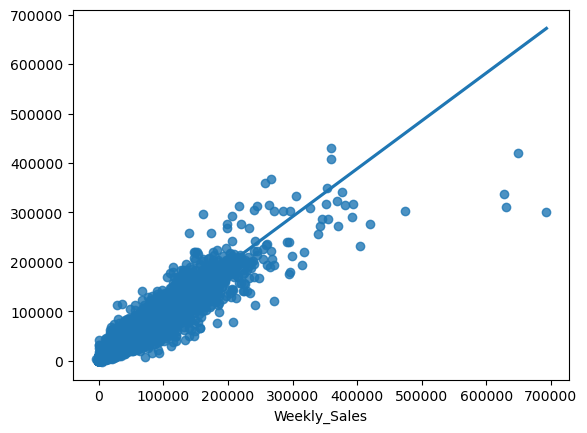

In [141]:
sns.regplot(x=y_train, y=y_valid_predict);

In [142]:
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

0.9732696234972438

In [143]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict

array([27213.4614, 18380.9656, 18331.1837, ...,   621.9031,   640.5849,
         711.865 ])

In [144]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_

<AxesSubplot:>

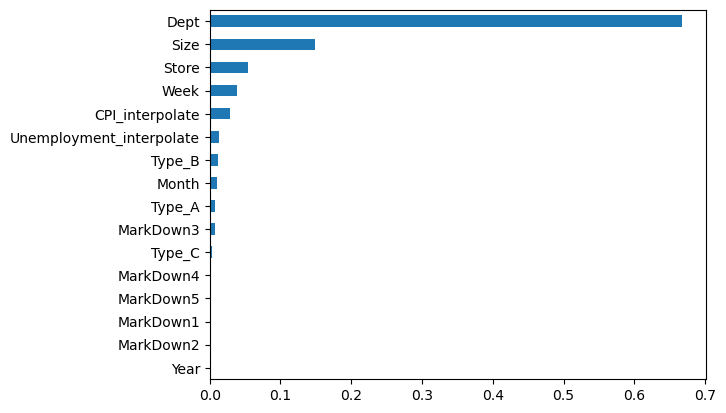

In [145]:
fi.nlargest(20).sort_values(ascending=True).plot.barh()

## 제출

In [146]:
submit = pd.read_csv(f'{base_path}/sampleSubmission.csv.zip')
submit.head(2)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0


In [147]:
submit["Weekly_Sales"] = y_predict

In [148]:
file_name = f"{base_path}/submission_{rmse:.4f}.csv"
file_name

'../data/Minip4/submission_3708.0343.csv'

In [149]:
submit.to_csv(file_name, index=False)

In [150]:
pd.read_csv(file_name)

,Id,Weekly_Sales
0,1_1_2012-11-02,27213.4614
1,1_1_2012-11-09,18380.9656
2,1_1_2012-11-16,18331.1837
3,1_1_2012-11-23,19441.2206
4,1_1_2012-11-30,20215.3526
...,...,...
115059,45_98_2013-06-28,650.5853
115060,45_98_2013-07-05,650.7921
115061,45_98_2013-07-12,621.9031
115062,45_98_2013-07-19,640.5849


[CV] END .....max_depth=31, max_features=0.21513432450663938; total time=  40.4s
[CV] END ......max_depth=31, max_features=0.7568675684630254; total time= 1.3min
[CV] END .....max_depth=31, max_features=0.21513432450663938; total time=  40.8s
